In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

In [57]:
!curl -o ../data/births.csv https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2  258k    2  7412    0     0   9989      0  0:00:26 --:--:--  0:00:26  9975
100  258k  100  258k    0     0   261k      0 --:--:-- --:--:-- --:--:--  261k


In [58]:
births = pd.read_csv("../data/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [59]:
births['decade'] = (births['year']//10)*10
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Births according to year')

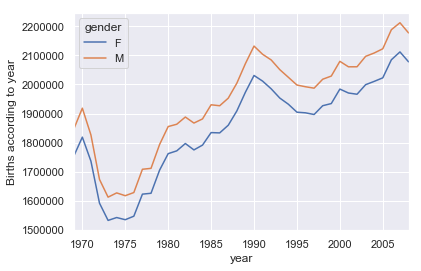

In [60]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Births according to year')

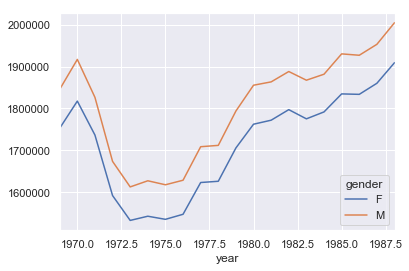

In [61]:
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu +5 * @sig)')
births['day'] = births['day'].astype(int)
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

In [62]:
births.index = pd.to_datetime((10000*births['year']) + (100*births['month']) + births['day'], format='%Y%m%d' )
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Text(0, 0.5, 'mean births by day')

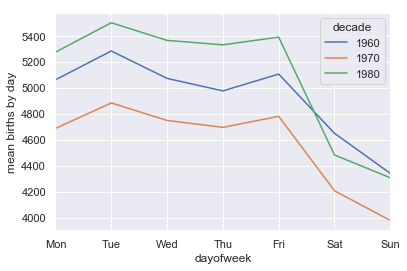

In [64]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [82]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [83]:
# Running this line twice will result in an error as the value, births_by_date.index is overwritten with a new one
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


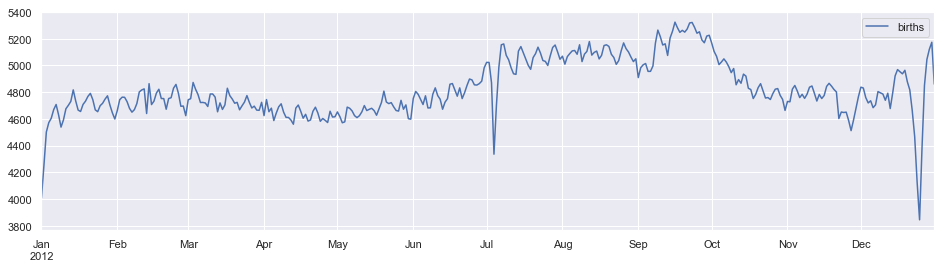

In [85]:
fig, ax = plt.subplots(figsize=(16, 4))
births_by_date.plot(ax=ax)